# Loading Pretrained and finetuned weights and models

In [1]:
!wget https://martin-krasser.de/sisr/weights-article-2.tar.gz

--2023-04-18 06:15:03--  https://martin-krasser.de/sisr/weights-article-2.tar.gz
Resolving martin-krasser.de (martin-krasser.de)... 217.160.0.142, 2001:8d8:100f:f000::209
Connecting to martin-krasser.de (martin-krasser.de)|217.160.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15959599 (15M) [application/gzip]
Saving to: ‘weights-article-2.tar.gz.1’

weights-article-2.t 100%[===================>]  15.22M  14.1MB/s    in 1.1s    

2023-04-18 06:15:04 (14.1 MB/s) - ‘weights-article-2.tar.gz.1’ saved [15959599/15959599]



In [2]:
!tar -xvzf weights-article-2.tar.gz

weights/
weights/article/
weights/article/weights-edsr-16-x4-fine-tuned.h5
weights/article/weights-wdsr-b-32-x4.h5
weights/article/weights-wdsr-b-32-x4-fine-tuned.h5
weights/article/weights-edsr-16-x4.h5


In [3]:
!git clone https://github.com/krasserm/super-resolution.git

fatal: destination path 'super-resolution' already exists and is not an empty directory.


In [4]:
import sys
sys.path.append('/content/super-resolution')

In [5]:
!wget https://github.com/kareka-gb/btp/raw/main/sat_img.jpeg

--2023-04-18 06:15:05--  https://github.com/kareka-gb/btp/raw/main/sat_img.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kareka-gb/btp/main/sat_img.jpeg [following]
--2023-04-18 06:15:05--  https://raw.githubusercontent.com/kareka-gb/btp/main/sat_img.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3031 (3.0K) [image/jpeg]
Saving to: ‘sat_img.jpeg.1’

sat_img.jpeg.1      100%[===================>]   2.96K  --.-KB/s    in 0s      

2023-04-18 06:15:05 (34.5 MB/s) - ‘sat_img.jpeg.1’ saved [3031/3031]



In [ ]:
!mkdir out

# Results

In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np

from model import resolve_single
from utils import load_image
from PIL import Image

%matplotlib inline

weights_dir = 'weights/article'
output_dir = 'out/'

def save_image(img, img_name):
    img_array = np.array(img)
    img = Image.fromarray(img_array, "RGB")
    img.save(os.path.join(output_dir, img_name))

def resolve_and_plot(model_pre_trained, model_fine_tuned, lr_image_path):
    lr = load_image(lr_image_path)
    
    sr_pt = resolve_single(model_pre_trained, lr)
    sr_ft = resolve_single(model_fine_tuned, lr)
    
    plt.figure(figsize=(20, 20))
    
    model_name = model_pre_trained.name.upper()
    save_image(sr_pt, "pre_tuned_x4_sat_img.png")
    save_image(sr_ft, "fine_tuned_x4_sat_img.png")
    images = [lr, sr_pt, sr_ft]
    titles = ['LR', f'SR ({model_name}, pixel loss)', f'SR ({model_name}, perceptual loss)']
    positions = [1, 3, 4]
    
    for i, (image, title, position) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, position)
        plt.imshow(image)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
      

img = Image.open('/content/sat_img.jpeg')
img.save('/content/sat_img.png')

mkdir: cannot create directory ‘out’: File exists


In [22]:
from model.edsr import edsr

edsr_pre_trained = edsr(scale=4, num_res_blocks=16)
edsr_pre_trained.load_weights(os.path.join(weights_dir, 'weights-edsr-16-x4.h5'))

edsr_fine_tuned = edsr(scale=4, num_res_blocks=16)
edsr_fine_tuned.load_weights(os.path.join(weights_dir, 'weights-edsr-16-x4-fine-tuned.h5'))

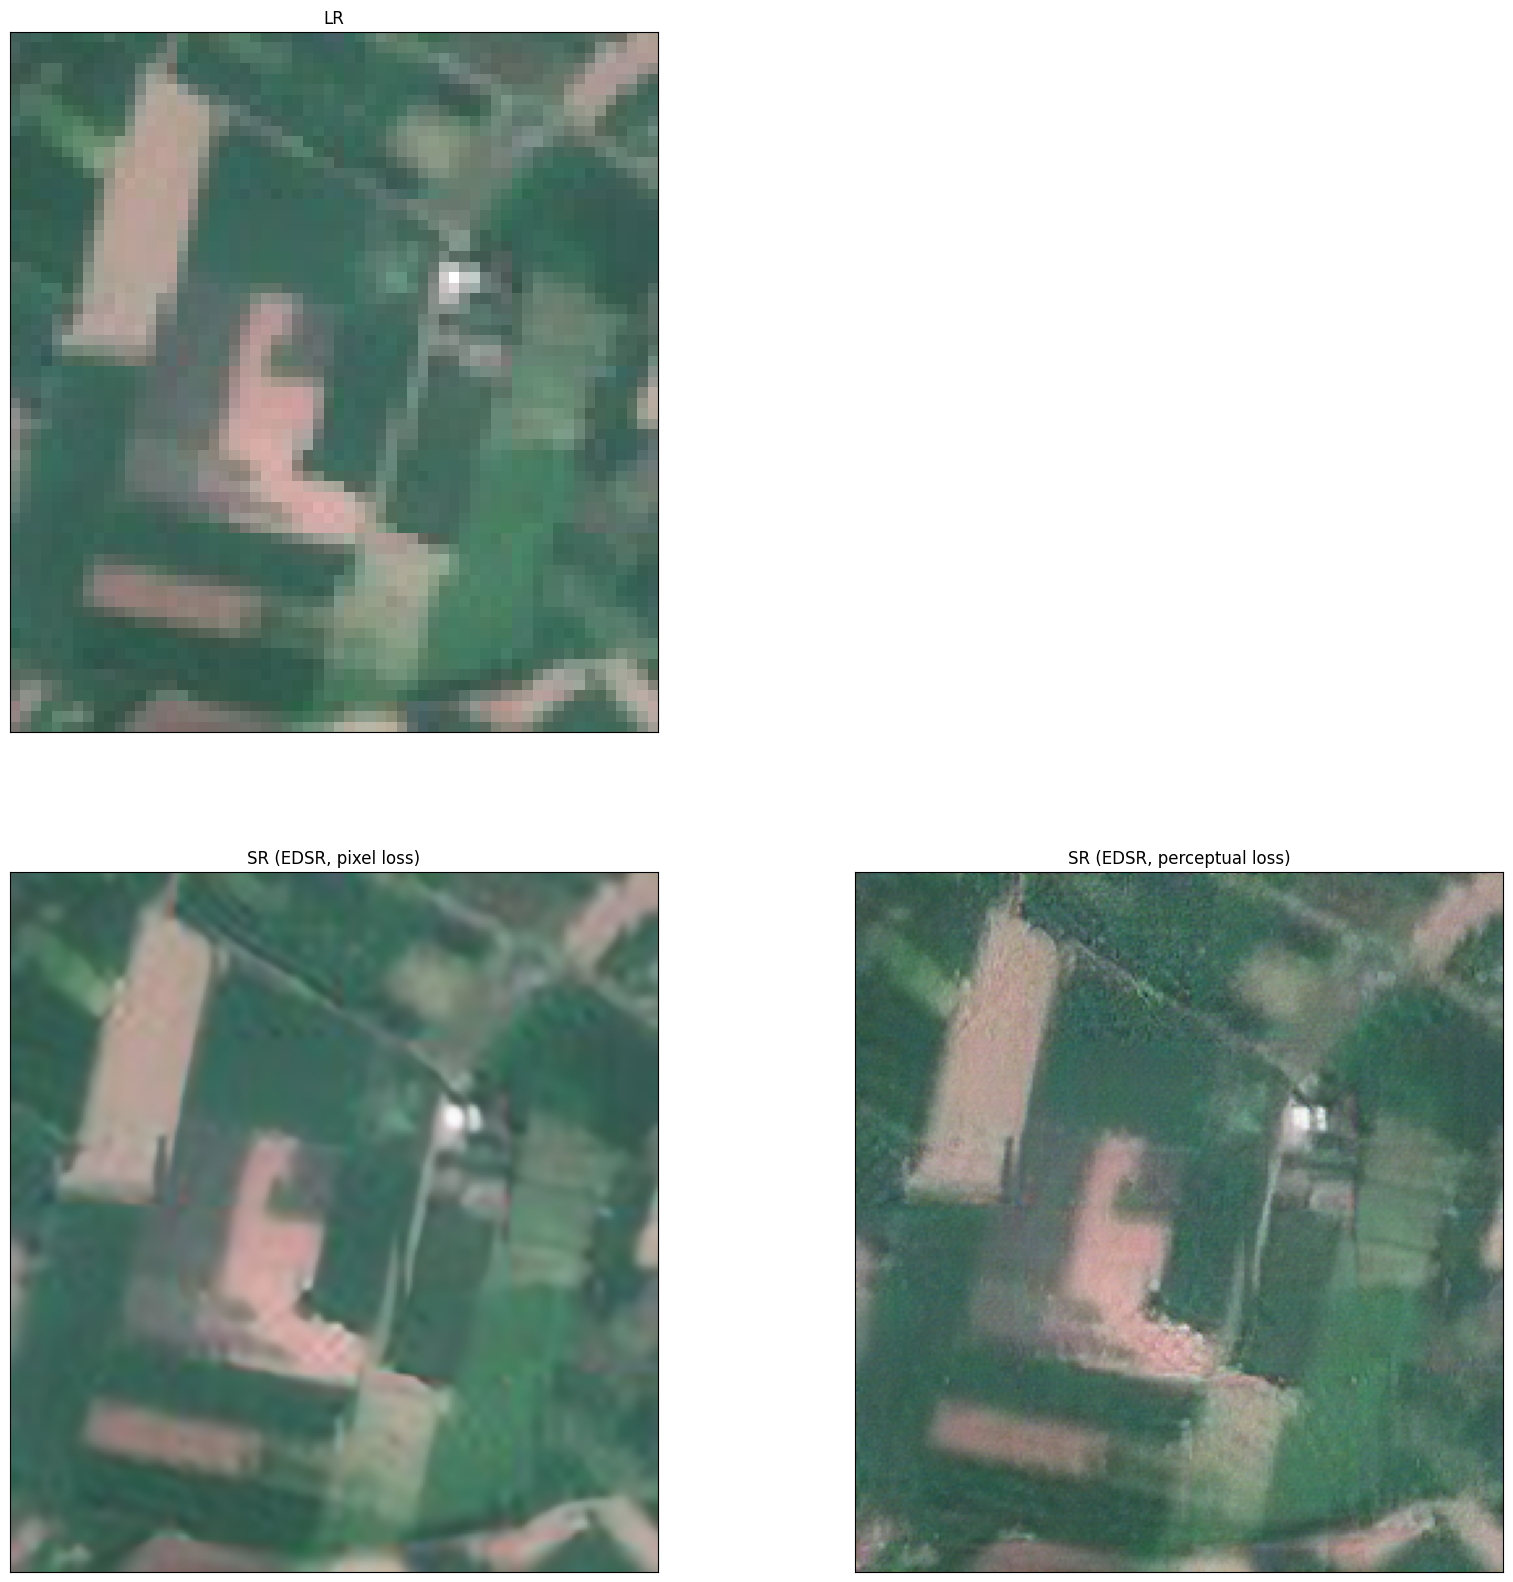

In [23]:
resolve_and_plot(edsr_pre_trained, edsr_fine_tuned, '/content/sat_img.png')

# Converting RGB image to panchromatic image

In [29]:
def cnvrt_to_gray(img_path):
    # Load RGB image
    rgb_image = Image.open(img_path)
    # Convert to grayscale
    gray_image = rgb_image.convert('L')

    return gray_image

def save_img(img, save_path, name):
    img.save(os.path.join(save_path, name));

In [30]:
pt_gray = cnvrt_to_gray(os.path.join(output_dir, 'pre_tuned_x4_sat_img.png'))
save_img(pt_gray, output_dir, 'pre_tuned_x4_sat_img_pan.png')

ft_gray = cnvrt_to_gray(os.path.join(output_dir, 'fine_tuned_x4_sat_img.png'))
save_img(ft_gray, output_dir, 'fine_tuned_x4_sat_img_pan.png')

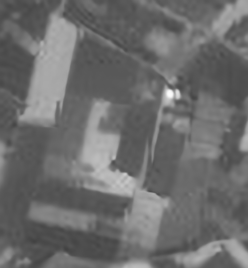

In [32]:
pt_gray.show()

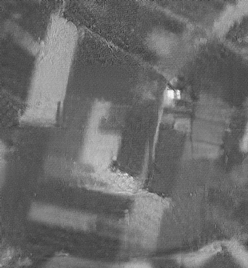

In [33]:
ft_gray.show()